In [288]:
import pandas as pd
import numpy  as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set(palette = 'mako', style = 'whitegrid')
plt.style.use('ggplot')

In [289]:
uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'

df = pd.read_csv(uri)

In [290]:
df.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [291]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [292]:
a_rename = {
    'mileage_per_year':'milhagem (mi/a)',
    'model_year':'ano',
    'price':'preco',
    'sold':'vendido'
}

df.rename(columns= a_rename, inplace = True)

In [293]:
df.head()

,milhagem (mi/a),ano,preco,vendido
0,21801,2000,30941.02,yes
1,7843,1998,40557.96,yes
2,7109,2006,89627.50,no
3,26823,2015,95276.14,no
4,7935,2014,117384.68,yes


In [294]:
a_trocar = {
    'no':0,
    'yes':1
}

df.vendido = df.vendido.map(a_trocar)
df.head()

,milhagem (mi/a),ano,preco,vendido
0,21801,2000,30941.02,1
1,7843,1998,40557.96,1
2,7109,2006,89627.50,0
3,26823,2015,95276.14,0
4,7935,2014,117384.68,1


In [295]:
from datetime import datetime

ano_atual = datetime.today().year

df['idade_do_modelo'] = ano_atual - df.ano
df.drop('ano', axis = 1, inplace = True)

In [296]:
df.head()

,milhagem (mi/a),preco,vendido,idade_do_modelo
0,21801,30941.02,1,21
1,7843,40557.96,1,23
2,7109,89627.50,0,15
3,26823,95276.14,0,6
4,7935,117384.68,1,7


In [297]:
df['kilometragem'] = (df['milhagem (mi/a)'] * 1.60934).round(2)
df.drop('milhagem (mi/a)', axis = 1, inplace = True)

In [298]:
df.head()

,preco,vendido,idade_do_modelo,kilometragem
0,30941.02,1,21,35085.22
1,40557.96,1,23,12622.05
2,89627.50,0,15,11440.80
3,95276.14,0,6,43167.33
4,117384.68,1,7,12770.11


In [299]:
from sklearn.model_selection import train_test_split
from sklearn.svm             import SVC
from sklearn.metrics         import accuracy_score

In [300]:
X = df.drop('vendido', axis = 1)
y = df['vendido']

In [301]:
np.random.seed(42)

tr_X, val_X, tr_y, val_y = train_test_split(X, y,
                                            test_size = 0.25)

In [302]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [303]:
scaled_tr_X  = scaler.fit_transform(tr_X)
scaled_val_X = scaler.fit_transform(val_X)

In [304]:
print(f'Foram utilizados {val_y.shape[0]} elementos para teste')

Foram utilizados 2500 elementos para teste


In [305]:
model = SVC()
model.fit(scaled_tr_X, tr_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [306]:
pred = model.predict(scaled_val_X)

In [307]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
dummy.fit(scaled_tr_X, tr_y)

/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


DummyClassifier(constant=None, random_state=None, strategy='warn')

In [308]:
print(f'A baseline é {dummy.score(val_y, pred_dummy) * 100}%')

A baseline é 100.0%


In [309]:
acc = accuracy_score(val_y, pred) * 100
acc_tree = accuracy_score(val_y, pred_tree) * 100
print(f'A acurácia do SVC é {acc}%')

A acurácia do SVC é 75.56%


In [310]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(max_depth= 4)
model_tree.fit(tr_X, tr_y)
pred_tree = model_tree.predict(scaled_val_X)

In [311]:
acc = accuracy_score(val_y, pred) * 100
print(f'A acurácia da decision tree é {acc_tree}%')

A acurácia da decision tree é 57.92%


In [312]:
X

,preco,idade_do_modelo,kilometragem
0,30941.02,21,35085.22
1,40557.96,23,12622.05
2,89627.50,15,11440.80
3,95276.14,6,43167.33
4,117384.68,7,12770.11
...,...,...,...
9995,97112.86,15,25060.64
9996,107424.63,19,21317.32
9997,93856.99,7,20950.39
9998,51250.57,10,16840.13


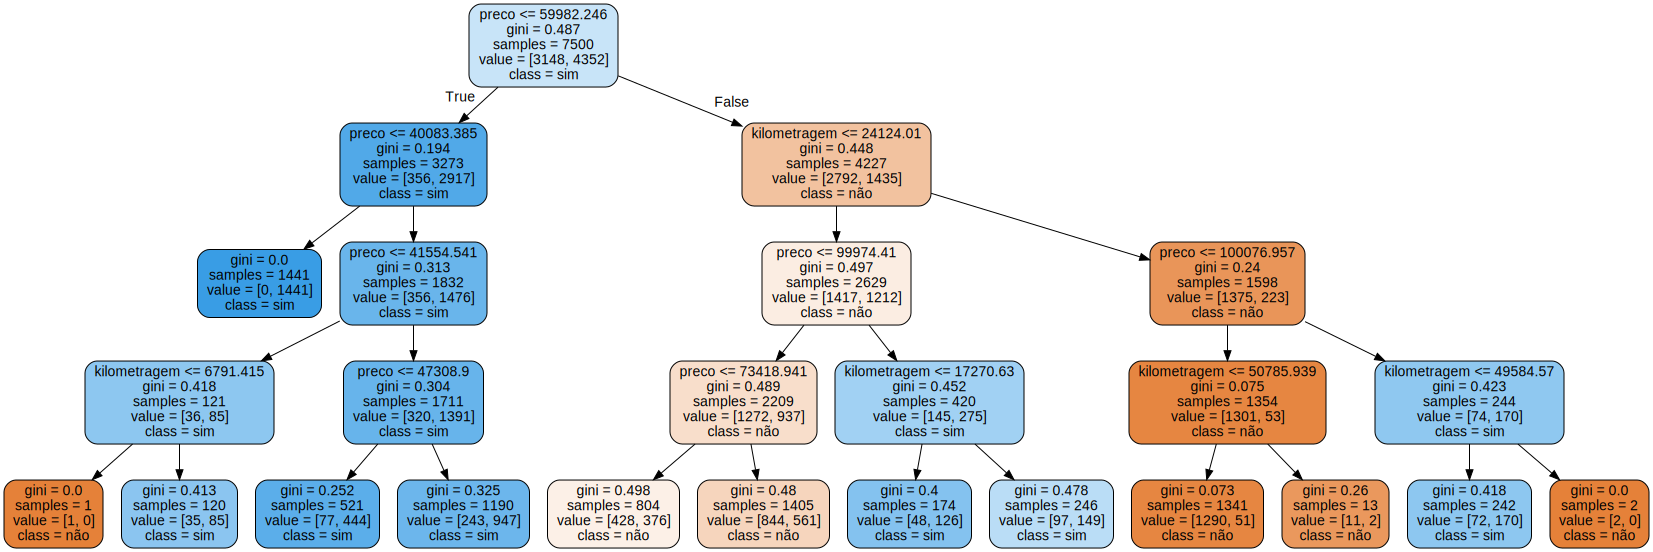

In [313]:
from sklearn.tree import export_graphviz
import graphviz

features = X.columns
dot_data = export_graphviz(model_tree, out_file = None,
                           feature_names = features, filled = True,
                           rounded = True, class_names = ['não', 'sim'])

graph = graphviz.Source(dot_data)
graph
